In [1]:
from helpers import h1
from queue import Queue
from pocket_cube.cube import Cube
from pocket_cube.moves import Move
from tests import *
import numpy as np
import time
from heapq import heappush,heappop,heapify
import matplotlib.pyplot as plt
from random import choice
from copy import copy
from math import log,sqrt
%matplotlib inline

In [2]:
%%time
pattern_database={}
final_state=Cube().goal_state
queue=Queue()
queue.put((final_state,0))
discovered_states={}
parent_dict={tuple(final_state):None}
while(queue.empty()==False):
    current_state,distance=queue.get()
    current_state_tuple=tuple(current_state)
    pattern_database[current_state_tuple]=distance
    discovered_states[current_state_tuple]=True
    for move_number in range(6):
        neighbor_state=Cube.move_state(current_state,move_number)
        neighbor_state_tuple=tuple(neighbor_state)
        if(parent_dict[current_state_tuple]==neighbor_state_tuple):
            continue
        if(neighbor_state_tuple in discovered_states):
            continue
        if(distance<=6):
            parent_dict[neighbor_state_tuple]=current_state_tuple
            queue.put((neighbor_state,distance+1))

CPU times: total: 6.16 s
Wall time: 6.17 s


In [3]:
def h3(current_state:np.ndarray,final_state:np.ndarray):
    if(tuple(current_state) in pattern_database):
        return pattern_database[tuple(current_state)]*1.0
    return h1(current_state,final_state)

In [30]:
def a_star(given_moves:str,heuristic):
    priority_queue=[]
    initial_cube=Cube(given_moves)
    initial_state=initial_cube.state
    goal_state=initial_cube.goal_state
    heappush(priority_queue,(heuristic(initial_state,initial_cube.goal_state),tuple(initial_state)))
    dictionary_g_function={}
    dictionary_g_function={tuple(initial_state) : 0}
    total_number_of_discovered_states=0
    parents={}
    parents[tuple(initial_state)]=None
    in_priority_queue={tuple(initial_state):None}
    while priority_queue!=[]:
        (f_value,current_state)=heappop(priority_queue)
        total_number_of_discovered_states += 1
        if(list(current_state)==initial_cube.goal_state.tolist()):
            return total_number_of_discovered_states,f_value
        current_state_array=np.array(current_state)
        current_g_value=dictionary_g_function[current_state]
        current_state_tuple=tuple(current_state_array)
        discovered_states[current_state_tuple]=True
        in_priority_queue.pop(current_state_tuple)
        for move_number in range(6):
            neigh_state=Cube.move_state(current_state_array,move_number)
            neigh_state_tuple=tuple(neigh_state)
            if(parents[current_state_tuple]==neigh_state_tuple):
                continue
            h_value=heuristic(neigh_state,goal_state)
            new_g_value=current_g_value+1
            f=new_g_value+h_value
            if(neigh_state_tuple not in dictionary_g_function):
                dictionary_g_function[neigh_state_tuple]=new_g_value
                parents[neigh_state_tuple]=current_state_tuple
                heappush(priority_queue,(f,neigh_state_tuple))
                in_priority_queue[neigh_state_tuple]=None
            else:
                if(new_g_value < dictionary_g_function[neigh_state_tuple]):
                    old_g= dictionary_g_function[neigh_state_tuple]
                    if(neigh_state_tuple in in_priority_queue):
                        index_current_neigh_state=priority_queue.index((old_g+h_value,
                                                                        neigh_state_tuple))
                        priority_queue[index_current_neigh_state] = (f,neigh_state_tuple)
                        heapify(priority_queue)
                    else:
                        heappush(priority_queue,(f,neigh_state_tuple))
                        in_priority_queue[neigh_state_tuple]=None
                        parents[neigh_state_tuple]=current_state_tuple
                    dictionary_g_function[neigh_state_tuple] = new_g_value

In [31]:
times_a_star_h3,states_a_star_h3,path_length_a_star_h3=[],[],[]
for case in [case1,case2,case3,case4]:
    start_time=time.time()
    results_a_star=a_star(case,h3)
    end_time=time.time()
    times_a_star_h3.append(end_time-start_time)
    states_a_star_h3.append(results_a_star[0])
    path_length_a_star_h3.append(results_a_star[1])

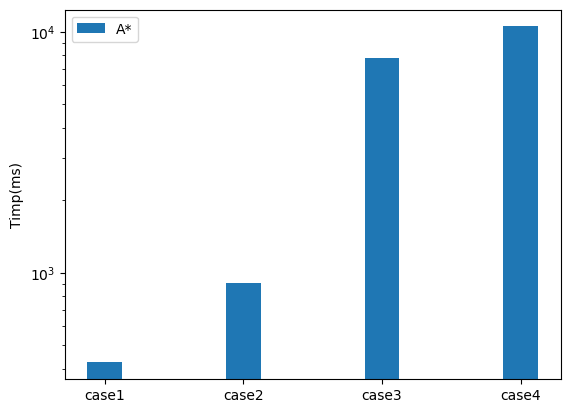

In [32]:
fig,ax=plt.subplots()
ax.bar(np.arange(4),np.array(times_a_star_h3)*1000,label="A*",width=0.25)
ax.set_xticks(np.arange(4),np.array(["case1","case2","case3","case4"]))
ax.set_ylabel("Timp(ms)")
ax.legend()
plt.yscale('log')
plt.show()

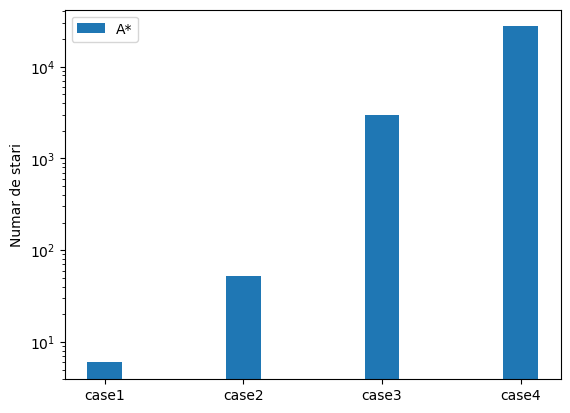

In [33]:
fig,ax=plt.subplots()
ax.bar(np.arange(4),np.array(states_a_star_h3),label="A*",width=0.25)
ax.set_xticks(np.arange(4),np.array(["case1","case2","case3","case4"]))
ax.set_ylabel("Numar de stari")
ax.legend()
plt.yscale('log')
plt.show()

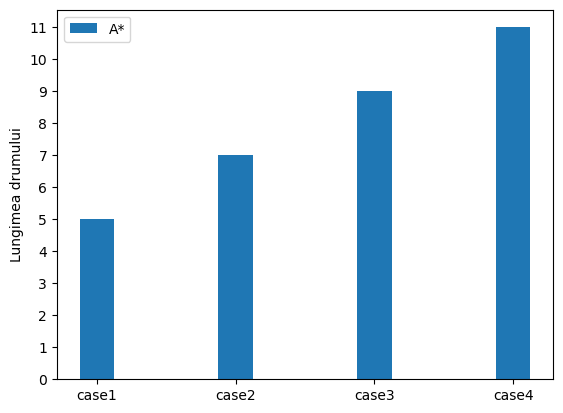

In [34]:
fig,ax=plt.subplots()
ax.bar(np.arange(4),np.array(path_length_a_star_h3),label="A*",width=0.25)
ax.set_xticks(np.arange(4),np.array(["case1","case2","case3","case4"]))
ax.set_ylabel("Lungimea drumului")
ax.set_yticks(np.arange(12))
ax.legend()
plt.show()

In [11]:
# Constante

N = 'N'
Q = 'Q'
PARENT = 'parent'
ACTIONS = 'actions'

In [12]:
# Funcție ce întoarce un nod nou,
def init_node(parent = None):
    return {N: 0, Q: 0, PARENT: parent, ACTIONS: {}}

In [13]:
def select_action(node, c):
    N_node = node[N]
    actions_dictionary=node[ACTIONS]
    maximum_expression=None
    action_result=None
    for action_id,child_node in actions_dictionary.items():
        quality_child_node=child_node[Q]
        simulations_child_node=child_node[N]
        expr_result=quality_child_node/simulations_child_node+c*sqrt(2*log(N_node)/simulations_child_node)
        if(maximum_expression==None):
            maximum_expression=expr_result
            action_result=action_id
        else:
            if(expr_result > maximum_expression):
                maximum_expression=expr_result
                action_result=action_id
    return action_result

In [14]:
def get_available_actions(current_state:np.ndarray,discovered_states:dict):
    available_actions=[]
    for move_number in range(6):
        new_state=Cube.move_state(current_state,move_number)
        if(tuple(new_state) not in discovered_states):
            available_actions.append(move_number)
    return available_actions

In [22]:
def mcts(initial_state:np.ndarray,budget,c,final_state:np.ndarray,heuristic):
    tree = init_node()
    reached_final_state=False
    number_of_states=1
    discovered_states={tuple(initial_state):True}
    path_length=0
    can_break_budget_loop=False
    for i in range(budget):
        node = tree
        current_state=initial_state
        number_of_moves=0
        budget_path_length=0
        """
        Etapa de tree policy:
        cat timp nu am ajuns inca la un nod frunza
        daca la starea curenta nu avem toate nodurile expandate ne oprim
        altfel, alegem cel mai bun nod
        """
        while(node[ACTIONS]!={}):
            if(get_available_actions(current_state,discovered_states)!=[]):
                break
            best_move=select_action(node,c)
            current_state=Cube.move_state(current_state,best_move)
            node=node[ACTIONS][best_move]
            budget_path_length +=1
        """
        Construim un nod pe baza unei actiuni alese aleator. 
        Trebuie sa nu fim in starea finala si sa mai avem noduri de explorat
        """
        available_actions=get_available_actions(current_state,discovered_states)
        if((current_state.tolist()!=final_state.tolist()) and available_actions):
            random_move=choice(available_actions)
            child_node=init_node(node)
            current_state=Cube.move_state(current_state,random_move)
            #legam noul nod copil de arbore
            node[ACTIONS][random_move]=child_node
            node=child_node
            number_of_states +=1
            discovered_states[tuple(current_state)]=True
            budget_path_length +=1
        if(current_state.tolist()==final_state.tolist()):
            reached_final_state=True
            path_length=budget_path_length
        """
        Etapa default policy
        Din nodul curent se simuleaza jocul, alegandu-se mutari in mod aleator
        """
        maximum_value_reward=0
        rollout_discovered_states=copy(discovered_states)
        while((current_state.tolist()!=final_state.tolist()) and (number_of_moves<14)):
            maximum_value_reward=max(maximum_value_reward,8.5-heuristic(current_state,final_state))
            available_actions=get_available_actions(current_state,rollout_discovered_states)
            if(available_actions==[]):
                break
            random_move=choice(available_actions)
            current_state=Cube.move_state(current_state,random_move)
            number_of_moves +=1
            number_of_states+=1
            rollout_discovered_states[tuple(current_state)]=True
        maximum_value_reward=max(maximum_value_reward,8.5-heuristic(current_state,final_state))
        reward=maximum_value_reward
        while(node!=None):
            node[N] += 1
            node[Q] +=reward
            node=node[PARENT]
        if(reached_final_state==True):
            break
    if(reached_final_state):
        return number_of_states,path_length
    return None,None

In [23]:
def run_mcts(budget,c,iterations,case,heuristic):
    sum_path_length,sum_number_of_states,sum_total_time=0,0,0
    successes=0
    for i in range(iterations):
        start_time=time.time()
        number_of_states,path_length=mcts(Cube(case).state,budget,c,Cube(case).goal_state,heuristic)
        end_time=time.time()
        if(number_of_states and path_length):
            sum_total_time += (end_time-start_time)
            sum_path_length += path_length
            sum_number_of_states+=number_of_states
            successes+=1
    if(successes!=0):
        return sum_total_time/successes,sum_path_length/successes,sum_number_of_states/successes
    return None

def get_measurements(heuristic):
    measurements_array=np.zeros((4,3,2,4))
    for k,case in enumerate([case1,case2,case3,case4]):
        for i,c in enumerate([0.1,0.5]):
            for j,budget in enumerate([1000,5000,10000,20000]):
                print("Right now",case,"c=",c,"budget=",budget)
                result_mcts=run_mcts(budget,c,25,case,heuristic)
                if(result_mcts):
                    measurements_array[k][0][i][j]=result_mcts[0]
                    measurements_array[k][1][i][j]=result_mcts[1]
                    measurements_array[k][2][i][j]=result_mcts[2]
    return measurements_array

In [28]:
measurements_h3=get_measurements(h3)

Right now R U' R' F' U c= 0.1 budget= 1000
Right now R U' R' F' U c= 0.1 budget= 5000
Right now R U' R' F' U c= 0.1 budget= 10000
Right now R U' R' F' U c= 0.1 budget= 20000
Right now R U' R' F' U c= 0.5 budget= 1000
Right now R U' R' F' U c= 0.5 budget= 5000
Right now R U' R' F' U c= 0.5 budget= 10000
Right now R U' R' F' U c= 0.5 budget= 20000
Right now F' R U R U F' U' c= 0.1 budget= 1000
Right now F' R U R U F' U' c= 0.1 budget= 5000
Right now F' R U R U F' U' c= 0.1 budget= 10000
Right now F' R U R U F' U' c= 0.1 budget= 20000
Right now F' R U R U F' U' c= 0.5 budget= 1000
Right now F' R U R U F' U' c= 0.5 budget= 5000
Right now F' R U R U F' U' c= 0.5 budget= 10000
Right now F' R U R U F' U' c= 0.5 budget= 20000
Right now F U U F' U' R R F' R c= 0.1 budget= 1000
Right now F U U F' U' R R F' R c= 0.1 budget= 5000
Right now F U U F' U' R R F' R c= 0.1 budget= 10000
Right now F U U F' U' R R F' R c= 0.1 budget= 20000
Right now F U U F' U' R R F' R c= 0.5 budget= 1000
Right now F U U

In [42]:
measurements_h3[0][0]*1000

array([[   0.        ,  125.99992752,   42.00077057,   53.00045013],
       [ 450.99937916, 1934.23817708, 4823.37318361, 7658.56989225]])

In [43]:
measurements_h3[1][0]*1000

array([[    0.        ,     0.        ,     0.        ,   102.53667831],
       [    0.        ,     0.        ,  1827.33337084, 27126.00064278]])

In [44]:
measurements_h3[2][0]*1000

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [45]:
measurements_h3[3][0]*1000

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [40]:
times_a_star_h3[2]*1000

7753.227949142456